In [1]:
import os
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn import metrics, svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

import cv2
from PIL import Image
from skimage import color

Using TensorFlow backend.


In [0]:
import pickle

In [0]:
blnLoaData =  True
blnBuildModel = False

Load Data


In [4]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
binary_flder = '/content/drive/Shared drives/DS8013/Data/Binary/'


In [0]:
X = np.load(binary_flder + 'X.npy')
y = np.load(binary_flder + 'y.npy')
#y_onehot = np.load(binary_flder + 'y_onehot.npy')

In [0]:
X = X/255 #normlize images

In [0]:
unique_elements, counts_elements = np.unique(y, return_counts=True)

In [9]:
(list(zip(unique_elements, counts_elements)))

[('AnnualCrop', 3000),
 ('Forest', 3000),
 ('HerbaceousVegetation', 3000),
 ('Highway', 2500),
 ('Industrial', 2500),
 ('Pasture', 2000),
 ('PermanentCrop', 2500),
 ('Residential', 3000),
 ('River', 2500),
 ('SeaLake', 3000)]

Flatten Data

In [10]:
X_flatten = X.flatten().reshape(len(X), 64*64*3) # flatten 64*64*3 = 12288

X_flatten.shape

(27000, 12288)

Label Encoder for y




In [0]:
#label encoding to integer
le = preprocessing.LabelEncoder()
le.fit(y)

#after encoding
y_le = le.transform(y)


One-encoder for Y

In [0]:
# one hot encode

#label encoding to integer
le = preprocessing.LabelEncoder()
le.fit(y)

#after encoding
label_encoded = le.transform(y)

# one hot encode
y_onehot = to_categorical(label_encoded)

In [13]:
y_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Split data



In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_flatten, y_le, test_size=0.2, random_state=42, shuffle=True)

In [15]:
le.inverse_transform([np.argmax(y_train[101])])

array(['AnnualCrop'], dtype='<U20')

In [16]:
X_train.shape

(21600, 12288)

In [17]:
X_test.shape

(5400, 12288)

In [18]:
y_train[0:10]

array([0, 4, 3, 9, 2, 1, 0, 8, 7, 3])

In [19]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
(list(zip(le.inverse_transform(unique_elements), counts_elements)))

[('AnnualCrop', 2388),
 ('Forest', 2395),
 ('HerbaceousVegetation', 2423),
 ('Highway', 2018),
 ('Industrial', 2001),
 ('Pasture', 1604),
 ('PermanentCrop', 1995),
 ('Residential', 2402),
 ('River', 1991),
 ('SeaLake', 2383)]

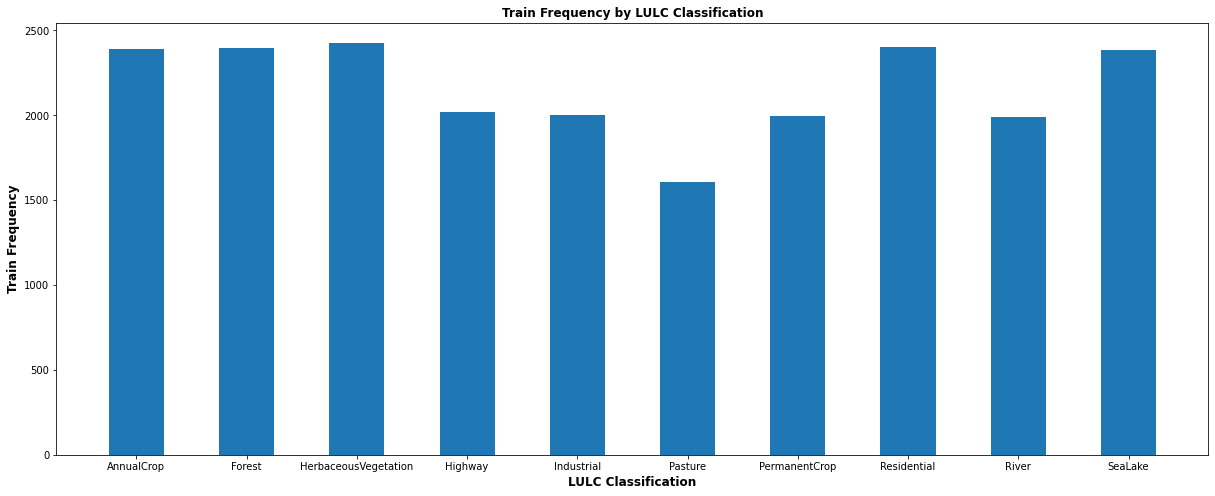

In [20]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(le.inverse_transform(unique_elements),counts_elements, width=0.5)
ax.set_ylabel('Train Frequency', fontsize='large', fontweight='bold')
ax.set_xlabel('LULC Classification', fontsize='large', fontweight='bold')
ax.set_title('Train Frequency by LULC Classification', fontsize='large', fontweight='bold')
plt.show()

## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier



In [0]:
model_flder = '/content/drive/Shared drives/DS8013/Model/'


if blnBuildModel :

  models = []
  for ntree in [100, 500, 1000]:
    for crit in ['gini']:
      print('ntree:', str(ntree) )
      forest_clf = RandomForestClassifier(random_state=42, n_estimators=ntree, criterion=crit)
      forest_clf.fit(X_train, y_train) # train the classifier
      
      models.append({'model':forest_clf, 'ntree':ntree, 'criterion':crit})
      pickle.dump(models, open(model_flder + 'Normal_RandomForest_Models.p' , "wb" ) )
  
else:

  models = pickle.load(open(model_flder + 'Normal_RandomForest_Models.p', 'rb'))


In [0]:
models

[{'criterion': 'gini',
  'model': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_jobs=None, oob_score=False, random_state=42, verbose=0,
                         warm_start=False),
  'ntree': 100},
 {'criterion': 'gini',
  'model': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_spli

In [0]:
accuracy = []
for m in models:
  predicted = m['model'].predict(X_test)
  images_and_predictions = list(zip(X_test, le.inverse_transform(predicted), le.inverse_transform(y_test)))

  numCorrect = len([p for (p,a) in list(zip(predicted, y_test)) if p==a])
  accuracy.append( numCorrect / len(predicted))


In [0]:
accuracy

[0.6672222222222223, 0.6861111111111111, 0.6887037037037037]

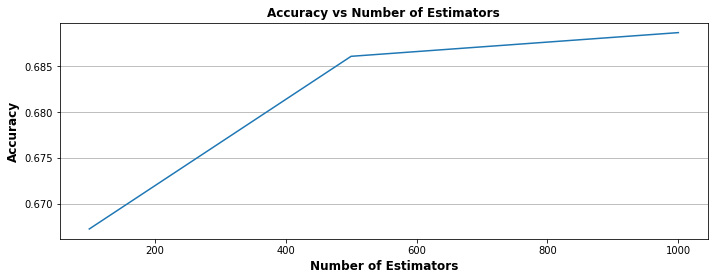

In [0]:
fig = plt.figure(figsize=(9,3))
ax = fig.add_axes([0,0,1,1])
ax.grid(axis='y', which='both')
ax.set_axisbelow(True)
ax.set_ylabel('Accuracy', fontsize='large', fontweight='bold')
ax.set_xlabel('Number of Estimators', fontsize='large', fontweight='bold')
ax.set_title('Accuracy vs Number of Estimators', fontsize='large', fontweight='bold')
plt.plot([100, 500, 1000], accuracy)



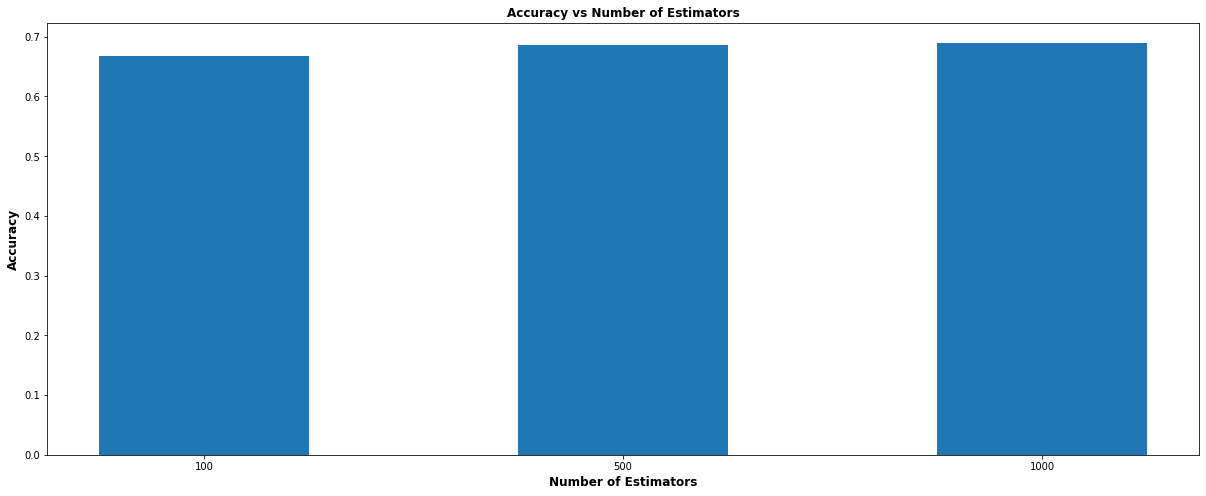

In [0]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(['100', '500', '1000'],accuracy, width=0.5)
ax.set_ylabel('Accuracy', fontsize='large', fontweight='bold')
ax.set_xlabel('Number of Estimators', fontsize='large', fontweight='bold')
ax.set_title('Accuracy vs Number of Estimators', fontsize='large', fontweight='bold')
plt.show()

In [0]:
for i in range(1):
  print("a")

a
